# Genetic Operator Demonstration

In the demonstration notebook the genetic operators crossover and mutation will be presented and visualized for the simple bipartite graph example.

In [1]:
from copy import deepcopy
import matplotlib.pyplot as plt

import Optimize_Layout.Gen_Bipartite_Graph as gbg
import Optimize_Layout.Bi_Graph as big
import Optimize_Layout.Genetic_Operators as ga_oper
import Optimize_Layout.GA_Operator_Plot as ga_oper_plt
import Optimize_Layout.GA_Visualization as gv
import Optimize_Layout.Population as pop

In [2]:
# Set Font Parameters
size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)

### Generate Parents

In [3]:
# Play with these parameters the change the original graph
left_min = 10
left_max = 10

right_min = 10
right_max = 10

num_edges = 12

# Generate network
network_1 = gbg.gen_bipartite_graph(left_min, left_max, right_min, right_max, num_edges)

bipartite_graph_1 = big.Bi_Graph(network_1)
bipartite_graph_1.set_node_dict_attr()

bipartite_graph_1_copy = deepcopy(bipartite_graph_1)

bipartite_graph_2 = pop.scramble_network(bipartite_graph_1_copy)
bipartite_graph_2 = big.Bi_Graph(bipartite_graph_2.network)
bipartite_graph_2.set_node_dict_attr()

parent_1 = (bipartite_graph_1.num_line_crossings, bipartite_graph_1)
parent_2 = (bipartite_graph_2.num_line_crossings, bipartite_graph_2)

parents = (parent_1, parent_2)

### Crossover Demonstration

Crossover is done by taking the y coordinates at one level of one parent and applying it to one offspring. The other is generated by using the y-coordinates of that same level from the other parent. In total 2 offspring are produced and progressed to the mutation operator.

c:\Users\e406897\Documents\Python\School\Enabling_AI_Tech\Optimize_Layout\GA_Operator_Plot.py:86: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.combo_fig.show()


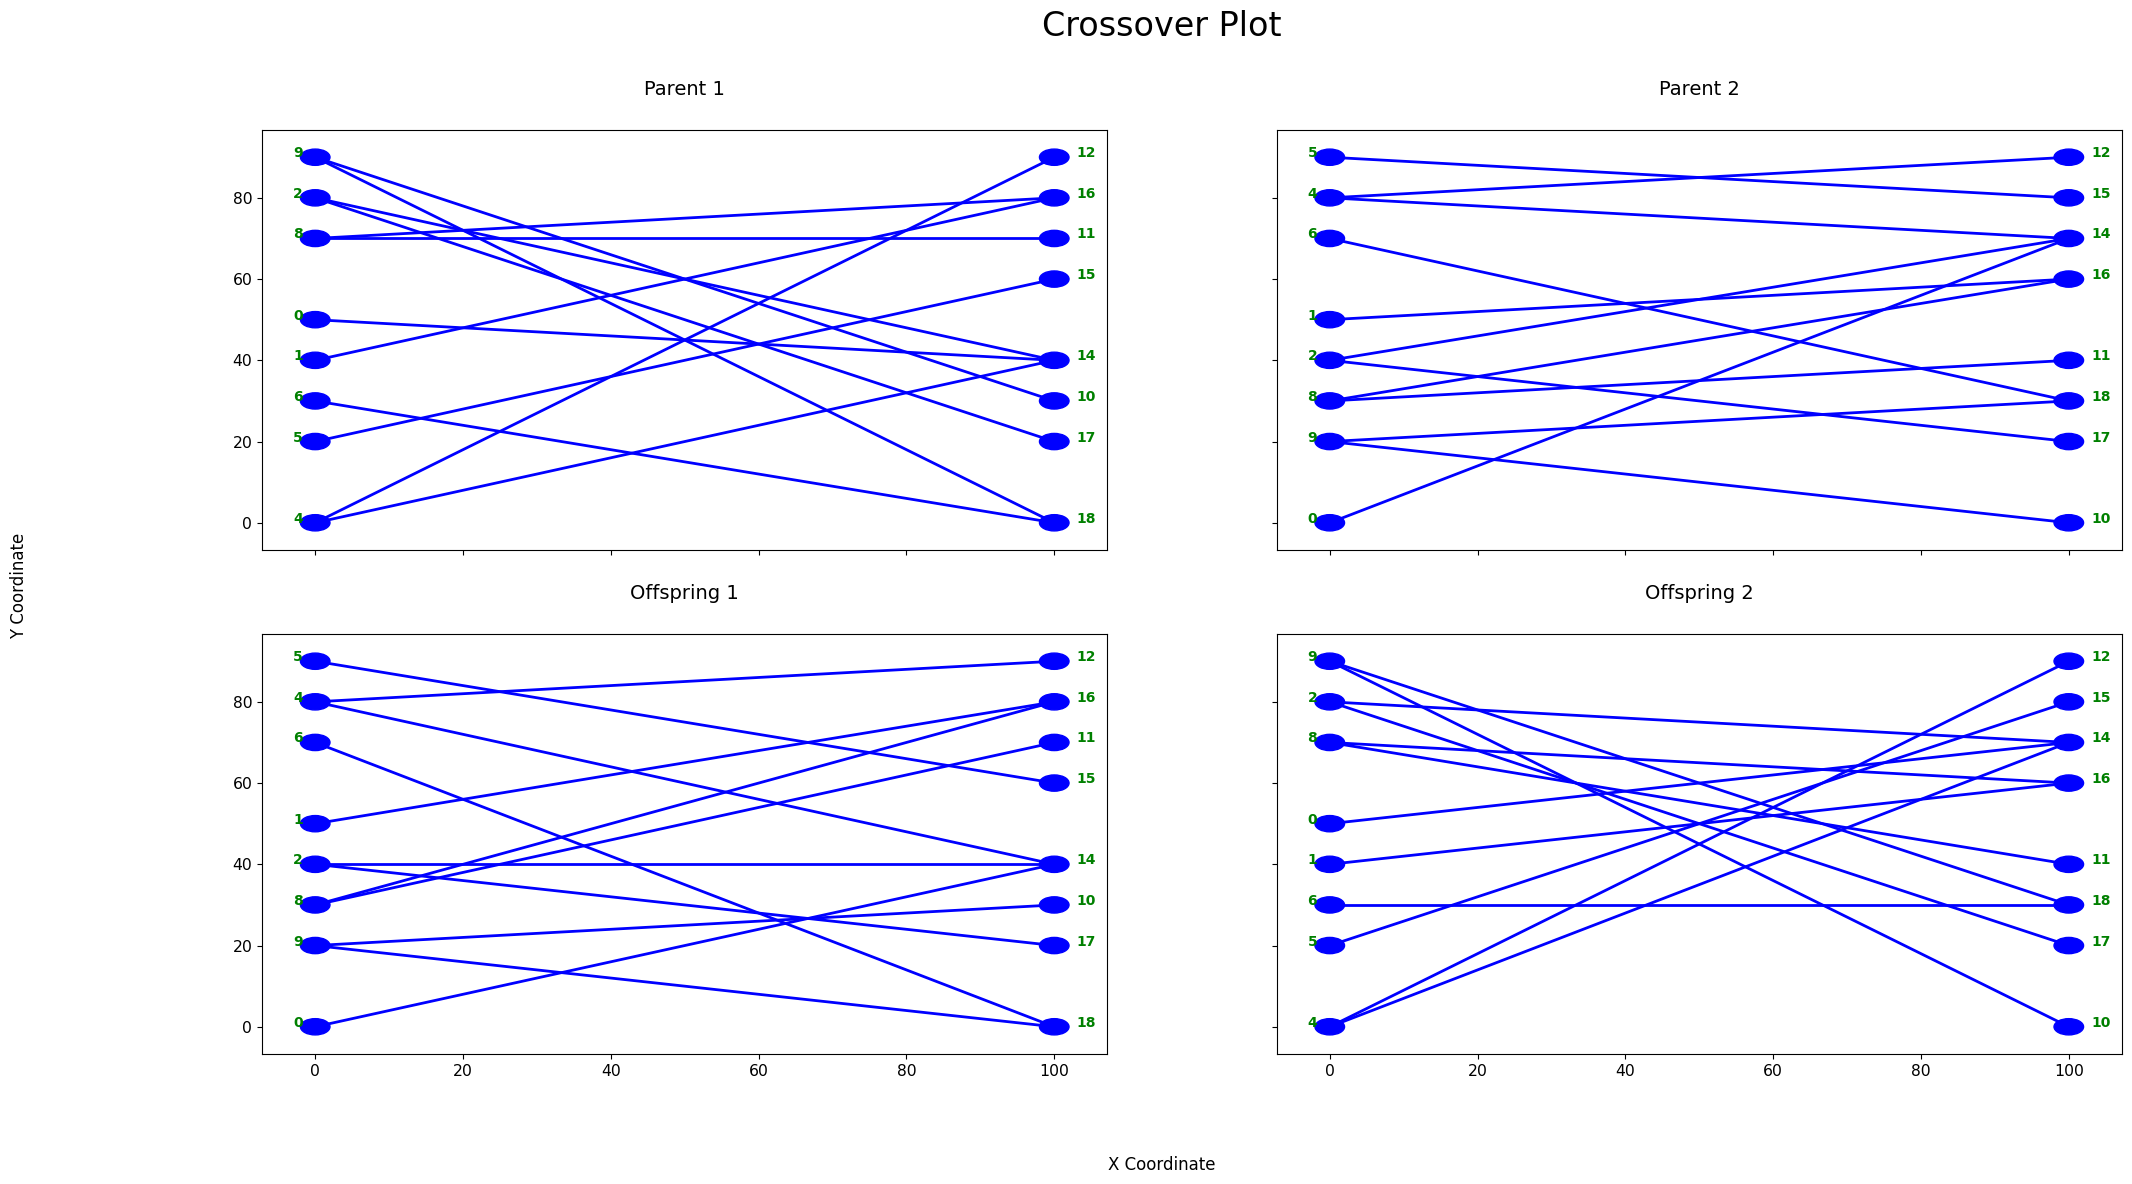

In [4]:
plt.rcParams['figure.figsize'] = [24, 12]
offspring = ga_oper.crossover(parents, 1)

parents_only = (parents[0][1], parents[1][1])
crossover_plot = ga_oper_plt.GA_Operator_Plot("Crossover Plot", "Parent 1", "Parent 2", "Offspring 1", "Offspring 2")
crossover_plot.update_plot(parents_only, offspring)

The crossover operation takes the y positions of ones level from one parents and applies it to one offspring. The other offspring receives the other parents y positions for that level. For the case of the 2 level bipartite graph crossover may be less useful than other applications because of how few combinations of crossovers are possible. However, the crossover operation can be extended to more complicated problems to help guide the search. Defined in the presented genetic algorithm is the crossover rate, which is a probabilty threshold that determines if crossover will take place. This introduces more randomness into the simple 2-level bipartite graph scenario by allowing the parents to progress instead of the crossover offspring.

### Mutation Demonstration

Mutation is done by selecting a random node and altering it's y position. If it's y position lands in the location of another node, then the node positions are swapped.

c:\Users\e406897\Documents\Python\School\Enabling_AI_Tech\Optimize_Layout\GA_Visualization.py:41: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  combo_fig.show()


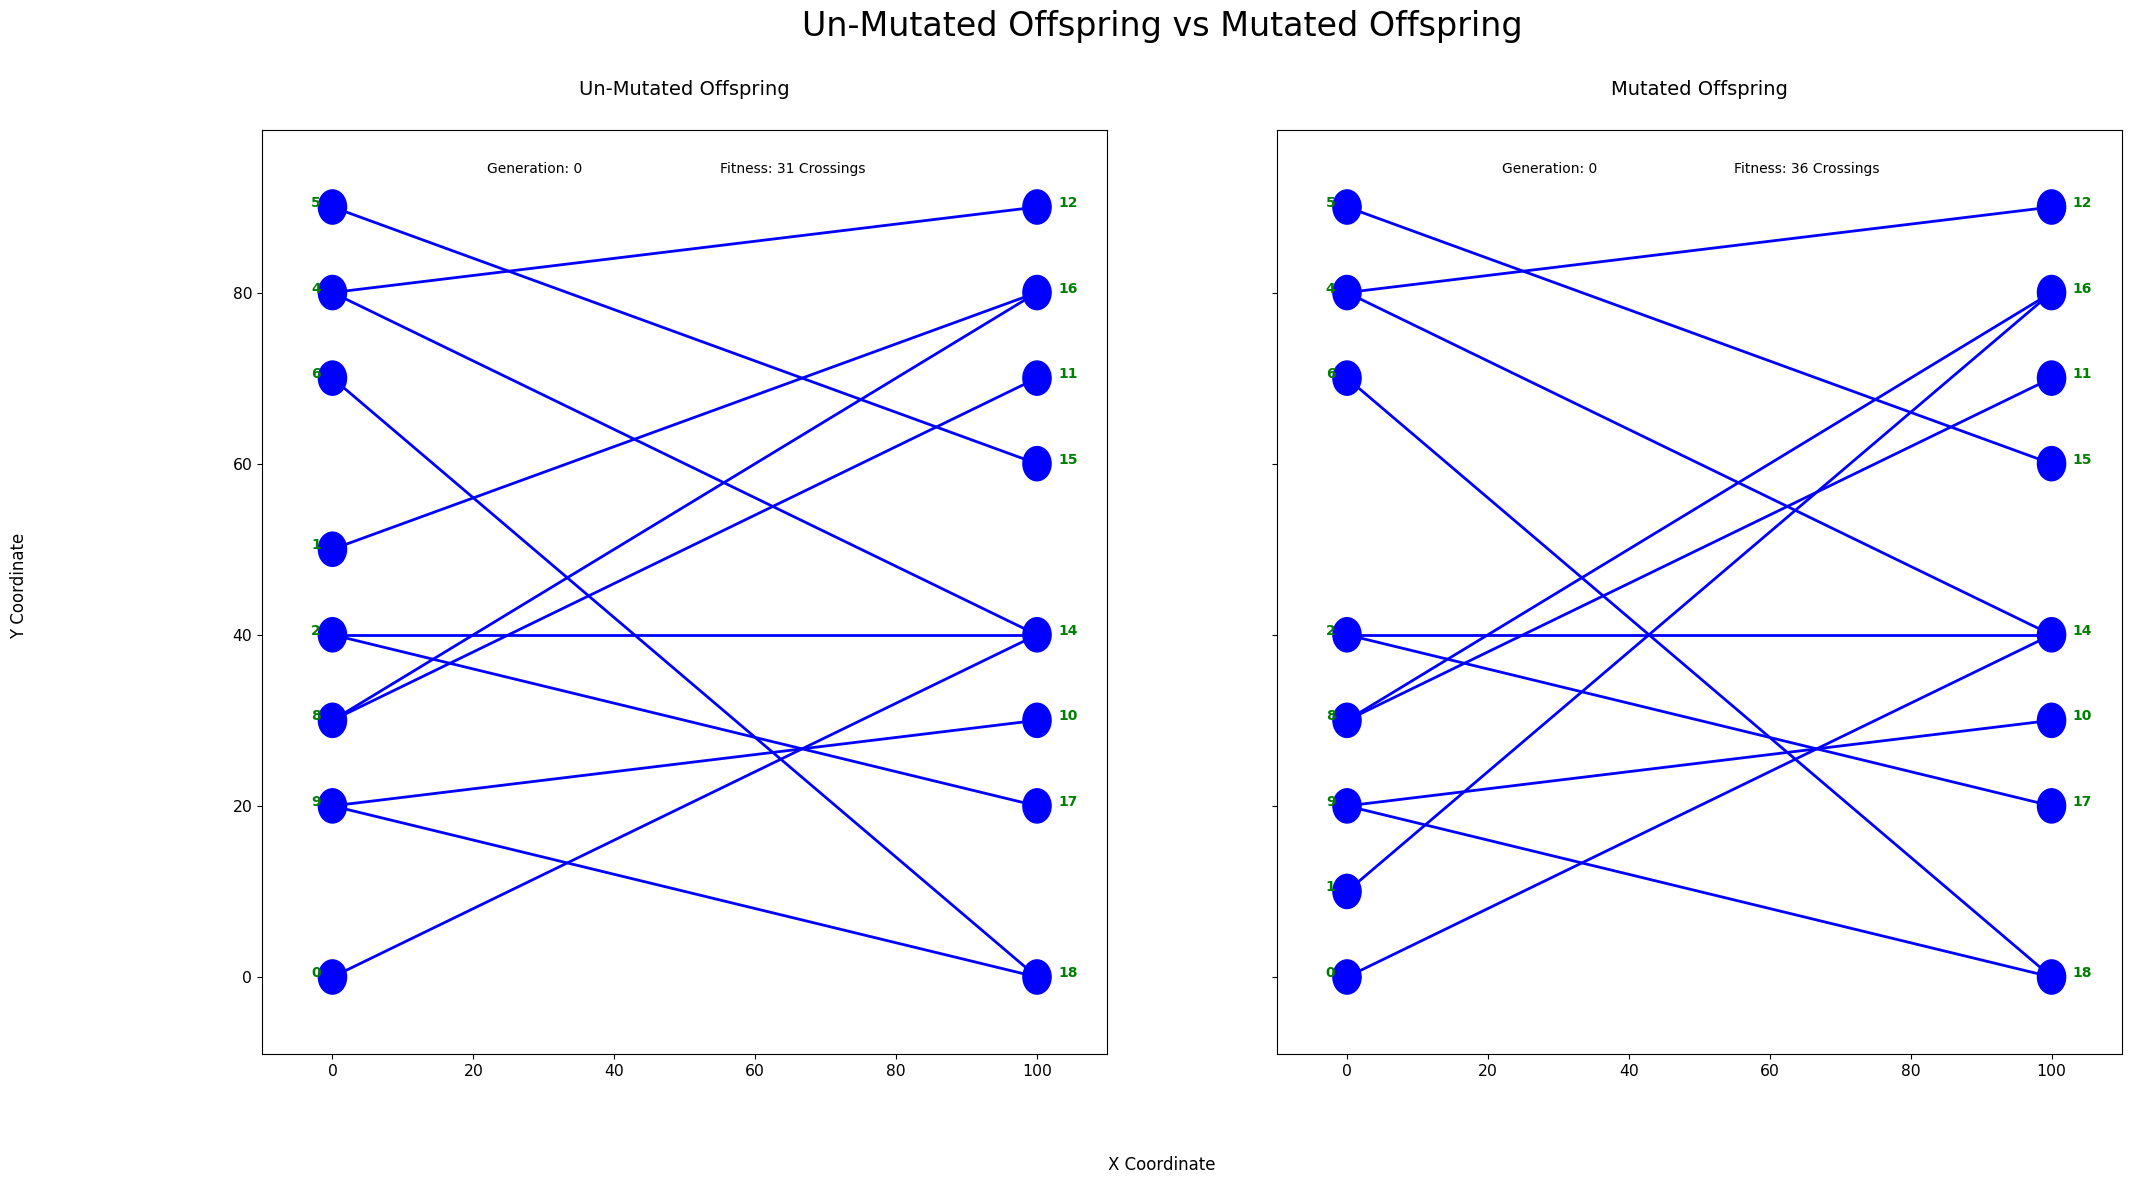

In [5]:
plt.rcParams['figure.figsize'] = [24, 12]

random_draw = 0

max_ypos = offspring[0].max_ypos

offspring_orig = deepcopy(offspring[0])

mutated_offspring = ga_oper.mutate(offspring[0], 1, random_draw, max_ypos)

gv.compare_plots(offspring_orig, "Un-Mutated Offspring", mutated_offspring, "Mutated Offspring", 0)

From the plot above, you can see that one or two nodes of a level have their positions changed. This sometimes leads to a better fitness score, in this case less line crossings. On the contrary, sometimes the fitness is decreased. A reduction in fitness is not necessarily a bad thing since it allows for a more thorough search of the solution space without convergence on the greedy solution. Mutation also only occurs if it is randomly selected for mutation based on it's probability of mutation threshold known as the mutation rate.

Between crossover and mutation, the population of solutions are able to be manipulated to change fitness values and evolve them over time. These two mechanics are the basis for the evolutionary process and allow the stochastic search to use exploration and exploitation to find highly fit solutions.  